# The Human Disease Network

Álvaro Huertas García

Sara Dorado Alfaro

Enlaces:

* https://nbviewer.jupyter.org/github/empet/Human-Disease-Network/blob/master/Human-Disease-Network.ipynb

* http://snap.stanford.edu/deepnetbio-ismb/ipynb/Human+Disease+Network.html 

## Load Graph

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import csv
import numpy as np
import pandas as pd

A continuación, importamos los datos correspondientes a los nodos (enfermedades) de la red Human Disease Network (HDN)

In [2]:
hdn = nx.read_edgelist('diseasome.edgelist.txt')
hdn.name = 'Human Disease Network'

# Comprobamos que los nodos carecen de informacion
hdn.node["222"]

{}

Cargamos el archivo con la meta-información para cada uno de los nodos. Se cargan como objetos `panda`. Observamos como tenemos 3 columnas: `Id`, `Label` y `Disease class`

In [3]:
### Load labels into
# metadata = pd.read_csv('disease.labels.txt', index_col='Id')
# metadata.index
metadata = pd.read_csv('disease.labels.txt')
metadata.head()

,Id,Label,Disease class
0,222,Osteoporosis,Bone
1,306,Epiphyseal dysplasia,Bone
2,277,Osteopetrosis,Bone
3,286,Osteogenesis imperfecta,Bone
4,288,"Achondrogenesis-hypochondrogenesis, type II",Bone


A continuación vamos a añadir a los nodos la meta-información. Para ello empleamos el atributo `add_node` de `networkx`. La columna `Label` pasará a ser la etiqueta `Disease` y la columna `Disease class` pasará a ser la etiqueta `Class`. De este modo, conseguimos incorporar información a los nodos de la red para facilitar la contextualización biológica cuando realicemos diferentes estudios sobre la misma. 

In [14]:
for node_id, data_label, data_class in zip(metadata["Id"], metadata["Label"], metadata["Disease class"]):
    hdn.add_node(str(node_id), Disease = data_label, Class = data_class)

# Prueba de que se ha añadido correctamente la informacion
hdn.node["222"]

{'Disease': 'Osteoporosis', 'Class': 'Bone'}

In [21]:
nx.write_edgelist(hdn, path = "./hdn_nodes_label.csv", delimiter=' ', data=True, encoding='utf-8')
nx.write_gexf(hdn, path = "hdn_simple.gexf", encoding='utf-8', prettyprint=True, version='1.1draft')

In [20]:
pd.unique(metadata["Disease class"])

array(['Bone', 'Cancer', 'Cardiovascular', 'Connective tissue disorder',
       'Dermatological', 'Developmental', 'Ear,Nose,Throat', 'Endocrine',
       'Gastrointestinal', 'Hematological', 'Immunological', 'Metabolic',
       'Multiple', 'Muscular', 'Neurological', 'Nutritional',
       'Ophthamological', 'Psychiatric', 'Renal', 'Respiratory',
       'Skeletal', 'Unclassified'], dtype=object)

## Graph Analysis

En primer lugar, se procede a realizar un análisis exploratorio de la red. En esta red los nodos son enfermedades y se encuentran conectadas entre sí, si comparten algún gen cuya mutación desencadena el fenotipo patológico. 

Podemos comprobar que la red se compone de 516 enfermedades, con un total de 1188 conexiones entre sí

In [5]:
## Orden y tamaño
tam =  nx.number_of_edges(hdn) # numero de aristas
orden = nx.number_of_nodes(hdn) # numero de vertices
print(nx.info(hdn))

Name: Human Disease Network
Type: Graph
Number of nodes: 516
Number of edges: 1188
Average degree:   4.6047


Comprobamos si se trata de un grafo dirigido o no dirigido. 

In [6]:
print(nx.is_directed(hdn))

False


Procedemos a estudiar la densidad del grafo, con la función `density` de `networkx`. La densidad para un grafo no dirigido se define como:

$$d = \dfrac{2|E|}{N(N-1)}$$

siendo $|E|$ el número de vértices y $N$ el número de nodos que componen el grafo. 

In [8]:
densidad = nx.density(hdn)
print(densidad)

0.008941070219011063


In [13]:
try:
    print(nx.diameter(hdn)) # If the diameter does not exit give an error show it
    
except:
    print("El diámetro del grafo no se puede conocer dado que se trata de un grafo no conexo")

15


In [24]:
## Generamos un diccionario con el nodo como clave y el grado como valor
degree_dic = dict(hdn.degree())

## Generamos una tupla con la pareja clave-valor, y extraemos la pareja con mayor valor (grado)
indice = int(max(degree_dic.items(), key = lambda k: k[1])[0])
print(metadata.loc[indice])

Label            Colon cancer
Disease class          Cancer
Name: 114, dtype: object


### Comparación con un grafo aleatorio

In [11]:
# Grafo aleatorio de mismo orden y tamaño
# Reutilizamos orden y tamaño calculado previamente

G_AL = nx.gnm_random_graph(orden, tam)
G_AL.name = "Aleatorio" # añadimos el atributo nombre

# Comprobamos que las caracteristicas sean iguales
print(nx.info(G_AL))

Name: Aleatorio
Type: Graph
Number of nodes: 516
Number of edges: 1188
Average degree:   4.6047


In [19]:
print("Aleatorio (G_AL) -->", nx.is_connected(G_AL),
      "\nNúmero de componentes (G_AL):", nx.number_connected_components(G_AL), 
      "\n\nGrafo inicial (hdn) --> ", nx.is_connected(hdn),
      "\nNúmero de componentes (hdn):", nx.number_connected_components(hdn))

Aleatorio (G_AL) --> False 
Número de componentes (G_AL): 2 

Grafo inicial (hdn) -->  True 
Número de componentes (hdn): 1


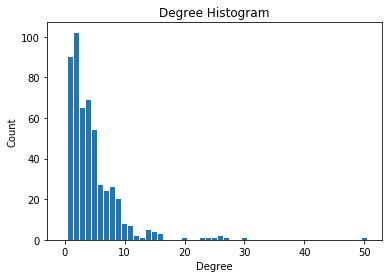

In [20]:
## Distribucion del grado de los nodos del grafo inicial
L=nx.degree_histogram(hdn)
plt.bar(range(len(L)),L, color='tab:blue')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

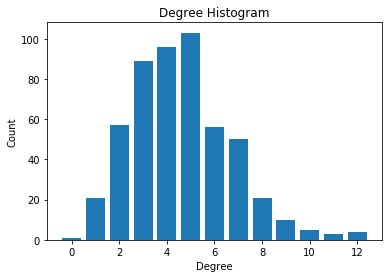

In [21]:
## Distribucion del grado de los nodos del grafo aleatorio
L=nx.degree_histogram(G_AL)
plt.bar(range(len(L)),L, color='tab:blue')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.show()

## Conclusiones del análisis inicial

* La red se compone de 516 nodos y 1188 aristas


* Es un grafo no dirigido


* Es un grafo disperso (densidad = 0.009)


* El diámetro del grafo es 15. 


* El grado medio del grafo es 4.6047